# EE 123 Homework 06

Bryan Ngo

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 2. Signal Interpolation

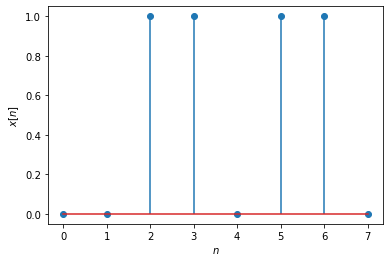

In [2]:
x = np.array([0, 0, 1, 1, 0, 1, 1, 0])

plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.stem(x);

## 2a: Linear Interpolation

In [3]:
x_lin_interp = np.empty(2 * len(x))
x_lin_interp[::2] = x
x_lin_interp[1::2] = 0.5 * (x + np.roll(x, 1))
print(x_lin_interp)

[0.  0.  0.  0.  1.  0.5 1.  1.  0.  0.5 1.  0.5 1.  1.  0.  0.5]


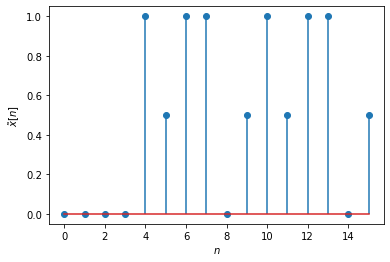

In [4]:

plt.xlabel("$n$")
plt.ylabel("$\\tilde{x}[n]$")
plt.stem(x_lin_interp);

Linear interpolation does not represent the original signal well, since it does not stay constant when it should.

## 2b. DFT Interpolation

In [5]:
X = np.fft.fft(x)

print(X)

[ 4.        +0.j -1.41421356+0.j -2.        +0.j  1.41421356+0.j
  0.        +0.j  1.41421356+0.j -2.        +0.j -1.41421356+0.j]


In [6]:
X_pad = np.zeros(2 * len(X), dtype=complex)
X_pad[:4] = 2 * X[:4]
X_pad[12:] = 2 * X[4:8]

x_dft_interp = np.fft.ifft(X_pad)
print(x_dft_interp)

[ 0.00000000e+00+0.j -4.48951068e-02+0.j -1.11022302e-16+0.j
  3.91613624e-01+0.j  1.00000000e+00+0.j  1.31549316e+00+0.j
  1.00000000e+00+0.j  3.37788326e-01+0.j  0.00000000e+00+0.j
  3.37788326e-01+0.j  1.00000000e+00+0.j  1.31549316e+00+0.j
  1.00000000e+00+0.j  3.91613624e-01+0.j -1.11022302e-16+0.j
 -4.48951068e-02+0.j]


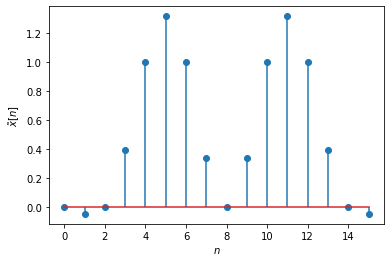

In [7]:
plt.xlabel("$n$")
plt.ylabel("$\\tilde{x}[n]$")
plt.stem(x_dft_interp.real);

DFT interpolation does not represent the original signal well since it smooths out the peaks.

## 2c. Haar Interpolation

In [8]:
H_8 = 1 / np.sqrt(8) * np.vstack((
    np.ones(8),
    np.hstack((np.ones(4), -np.ones(4))),
    np.hstack((
        np.repeat(np.sqrt(2), 2),
        -np.repeat(np.sqrt(2), 2),
        np.zeros(4)
    )),
    np.hstack((
        np.zeros(4),
        np.repeat(np.sqrt(2), 2),
        -np.repeat(np.sqrt(2), 2)
    )),
    np.pad([2, -2], (0, 6)),
    np.pad([2, -2], (2, 4)),
    np.pad([2, -2], (4, 2)),
    np.pad([2, -2], (6, 0)),
))

x_haar = H_8 @ x
print(x_haar)

[ 1.41421356  0.         -1.          0.          0.          0.
 -0.70710678  0.70710678]


In [9]:
x_haar_pad = np.hstack((np.sqrt(2) * x_haar, np.zeros(len(x_haar))))

H_16 = 1 / 4 * np.vstack((
    np.ones(16),

    np.hstack((np.ones(8), -np.ones(8))),
    
    np.hstack((
        np.repeat(np.sqrt(2), 4),
        -np.repeat(np.sqrt(2), 4),
        np.zeros(8)
    )),
    np.hstack((
        np.zeros(8),
        np.repeat(np.sqrt(2), 4),
        -np.repeat(np.sqrt(2), 4)
    )),

    np.pad(np.array([2, 2, -2, -2]), (0, 12)),
    np.pad(np.array([2, 2, -2, -2]), (4, 8)),
    np.pad(np.array([2, 2, -2, -2]), (8, 4)),
    np.pad(np.array([2, 2, -2, -2]), (12, 0)),

    np.pad(np.sqrt(8) * np.array([1, -1]), (0, 14)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (2, 12)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (4, 10)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (6, 8)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (8, 6)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (10, 4)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (12, 2)),
    np.pad(np.sqrt(8) * np.array([1, -1]), (14, 0)),
))

x_haar_interp = H_16.T @ x_haar_pad
print(x_haar_interp)

[-6.83580866e-17 -6.83580866e-17 -6.83580866e-17 -6.83580866e-17
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]


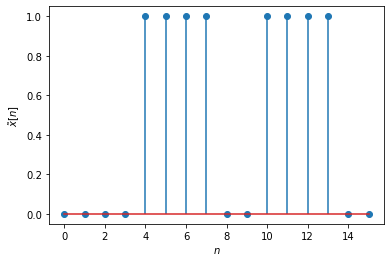

In [10]:
plt.xlabel("$n$")
plt.ylabel("$\\tilde{x}[n]$")
plt.stem(x_haar_interp);

Haar interpolation upsamples the signal perfectly.